<a href="https://colab.research.google.com/github/Sshubam/Liver-disease-Stage-prediction-SDS-BIT-MESRA/blob/main/SDS-Liver-Disease-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data description

 

1) ID: Unique Identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time.

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of the drug. D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: the presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: the presence of spiders N (No) or Y (Yes)

10) Edema: the presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [ ]:
import pandas as pd
train_df = pd.read_csv('train_dataset.csv')
train_df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

In [ ]:
df = train_df

In [ ]:
# Important Features: Ascites Edema Spiders Sex SGOT Alk_Phos Copper Status Bilirubin
# Least Important : N_Days Drug Age Prothrombin Albumin Cholesterol

In [ ]:
data_features=df.drop(['ID', 'N_Days','Stage', 'Age', 'Drug', 'Age', 'Prothrombin', 'Albumin', 'Cholesterol'],axis=1)
data_num_features = df.drop(['ID', 'Edema','Stage', 'Spiders', 'Hepatomegaly', 'Ascites', 'Sex', 'Status', 'N_Days', 'Drug', 'Age', 'Cholesterol', 'Prothrombin', 'Albumin'],axis=1)
data_num_features

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets
0,0.3,84.0,1500.8,99.43,109.0,293.0
1,0.3,NaN,1835.4,26.35,131.0,308.0
2,0.3,4.0,NaN,NaN,116.0,194.0
3,0.3,49.0,NaN,26.35,NaN,NaN
4,0.5,91.0,NaN,104.56,NaN,306.0
...,...,...,...,...,...,...
6795,0.9,NaN,3444.4,131.59,130.0,314.0
6796,0.3,43.0,NaN,NaN,238.0,399.0
6797,0.3,NaN,NaN,26.35,123.0,103.0
6798,0.3,12.0,289.0,72.95,134.0,354.0


In [ ]:
data_num_features

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets
0,0.3,84.0,1500.8,99.43,109.0,293.0
1,0.3,NaN,1835.4,26.35,131.0,308.0
2,0.3,4.0,NaN,NaN,116.0,194.0
3,0.3,49.0,NaN,26.35,NaN,NaN
4,0.5,91.0,NaN,104.56,NaN,306.0
...,...,...,...,...,...,...
6795,0.9,NaN,3444.4,131.59,130.0,314.0
6796,0.3,43.0,NaN,NaN,238.0,399.0
6797,0.3,NaN,NaN,26.35,123.0,103.0
6798,0.3,12.0,289.0,72.95,134.0,354.0


In [ ]:
data_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bilirubin      6800 non-null   float64
 1   Copper         4644 non-null   float64
 2   Alk_Phos       4302 non-null   float64
 3   SGOT           4698 non-null   float64
 4   Tryglicerides  3988 non-null   float64
 5   Platelets      6462 non-null   float64
dtypes: float64(6)
memory usage: 318.9 KB


In [ ]:
data_features

,Status,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets
0,CL,F,N,N,Y,N,0.3,84.0,1500.8,99.43,109.0,293.0
1,C,F,NaN,N,NaN,N,0.3,NaN,1835.4,26.35,131.0,308.0
2,D,F,N,N,NaN,N,0.3,4.0,NaN,NaN,116.0,194.0
3,C,F,NaN,Y,Y,N,0.3,49.0,NaN,26.35,NaN,NaN
4,CL,F,NaN,NaN,NaN,N,0.5,91.0,NaN,104.56,NaN,306.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6795,C,M,NaN,N,NaN,N,0.9,NaN,3444.4,131.59,130.0,314.0
6796,C,F,Y,N,N,N,0.3,43.0,NaN,NaN,238.0,399.0
6797,C,F,N,Y,NaN,N,0.3,NaN,NaN,26.35,123.0,103.0
6798,CL,F,N,NaN,Y,N,0.3,12.0,289.0,72.95,134.0,354.0


In [ ]:
data_num_features = data_num_features.interpolate(method ='quadratic', limit_direction ='forward')
data_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bilirubin      6800 non-null   float64
 1   Copper         6799 non-null   float64
 2   Alk_Phos       6799 non-null   float64
 3   SGOT           6800 non-null   float64
 4   Tryglicerides  6800 non-null   float64
 5   Platelets      6800 non-null   float64
dtypes: float64(6)
memory usage: 318.9 KB


In [ ]:
data_features = data_features.interpolate(method ='quadratic', limit_direction ='forward')
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         6800 non-null   object 
 1   Sex            6800 non-null   object 
 2   Ascites        4554 non-null   object 
 3   Hepatomegaly   4373 non-null   object 
 4   Spiders        4210 non-null   object 
 5   Edema          6800 non-null   object 
 6   Bilirubin      6800 non-null   float64
 7   Copper         6799 non-null   float64
 8   Alk_Phos       6799 non-null   float64
 9   SGOT           6800 non-null   float64
 10  Tryglicerides  6800 non-null   float64
 11  Platelets      6800 non-null   float64
dtypes: float64(6), object(6)
memory usage: 637.6+ KB


In [ ]:
data_features

,Status,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets
0,CL,F,N,N,Y,N,0.3,84.000000,1500.800000,99.430000,109.000000,293.000000
1,C,F,NaN,N,NaN,N,0.3,14.194495,1835.400000,26.350000,131.000000,308.000000
2,D,F,N,N,NaN,N,0.3,4.000000,1506.302159,-2.774251,116.000000,194.000000
3,C,F,NaN,Y,Y,N,0.3,49.000000,513.506477,26.350000,98.311996,236.435066
4,CL,F,NaN,NaN,NaN,N,0.5,91.000000,-161.542443,104.560000,89.651547,306.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6795,C,M,NaN,N,NaN,N,0.9,169.631476,3444.400000,131.590000,130.000000,314.000000
6796,C,F,Y,N,N,N,0.3,43.000000,3861.813736,74.470933,238.000000,399.000000
6797,C,F,N,Y,NaN,N,0.3,-9.543825,2810.013736,26.350000,123.000000,103.000000
6798,CL,F,N,NaN,Y,N,0.3,12.000000,289.000000,72.950000,134.000000,354.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_num_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
data_features_scaled

,Status,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets
0,CL,F,N,N,Y,N,-0.468071,0.227155,-0.183369,0.427943,-0.474542,-0.003345
1,C,F,NaN,N,NaN,N,-0.468071,-0.815074,0.001307,-1.112128,-0.056487,0.126636
2,D,F,N,N,NaN,N,-0.468071,-0.967283,-0.180333,-1.725886,-0.341525,-0.861220
3,C,F,NaN,Y,Y,N,-0.468071,-0.295411,-0.728287,-1.112128,-0.677641,-0.493503
4,CL,F,NaN,NaN,NaN,N,-0.405917,0.331669,-1.100868,0.536051,-0.842212,0.109306
...,...,...,...,...,...,...,...,...,...,...,...,...
6795,C,M,NaN,N,NaN,N,-0.281607,1.505674,0.889364,1.105675,-0.075489,0.178629
6796,C,F,Y,N,N,N,-0.468071,-0.384994,1.119747,-0.098039,1.976784,0.915188
6797,C,F,N,Y,NaN,N,-0.468071,-1.169498,0.539226,-1.112128,-0.208507,-1.649772
6798,CL,F,N,NaN,Y,N,-0.468071,-0.847839,-0.852199,-0.130091,0.000521,0.525245


In [ ]:
data_features_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         6800 non-null   object 
 1   Sex            6800 non-null   object 
 2   Ascites        4554 non-null   object 
 3   Hepatomegaly   4373 non-null   object 
 4   Spiders        4210 non-null   object 
 5   Edema          6800 non-null   object 
 6   Bilirubin      6800 non-null   float64
 7   Copper         6799 non-null   float64
 8   Alk_Phos       6799 non-null   float64
 9   SGOT           6800 non-null   float64
 10  Tryglicerides  6800 non-null   float64
 11  Platelets      6800 non-null   float64
dtypes: float64(6), object(6)
memory usage: 637.6+ KB


In [ ]:
data_encoded=pd.get_dummies(data_features_scaled)
data_encoded

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,-0.468071,0.227155,-0.183369,0.427943,-0.474542,-0.003345,0,1,0,1,0,1,0,1,0,0,1,1,0,0
1,-0.468071,-0.815074,0.001307,-1.112128,-0.056487,0.126636,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.468071,-0.967283,-0.180333,-1.725886,-0.341525,-0.861220,0,0,1,1,0,1,0,1,0,0,0,1,0,0
3,-0.468071,-0.295411,-0.728287,-1.112128,-0.677641,-0.493503,1,0,0,1,0,0,0,0,1,0,1,1,0,0
4,-0.405917,0.331669,-1.100868,0.536051,-0.842212,0.109306,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,-0.281607,1.505674,0.889364,1.105675,-0.075489,0.178629,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6796,-0.468071,-0.384994,1.119747,-0.098039,1.976784,0.915188,1,0,0,1,0,0,1,1,0,1,0,1,0,0
6797,-0.468071,-1.169498,0.539226,-1.112128,-0.208507,-1.649772,1,0,0,1,0,1,0,0,1,0,0,1,0,0
6798,-0.468071,-0.847839,-0.852199,-0.130091,0.000521,0.525245,0,1,0,1,0,1,0,0,0,0,1,1,0,0


In [ ]:
data_encoded = data_encoded[: -1]
data_encoded 

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,-0.468071,0.227155,-0.183369,0.427943,-0.474542,-0.003345,0,1,0,1,0,1,0,1,0,0,1,1,0,0
1,-0.468071,-0.815074,0.001307,-1.112128,-0.056487,0.126636,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.468071,-0.967283,-0.180333,-1.725886,-0.341525,-0.861220,0,0,1,1,0,1,0,1,0,0,0,1,0,0
3,-0.468071,-0.295411,-0.728287,-1.112128,-0.677641,-0.493503,1,0,0,1,0,0,0,0,1,0,1,1,0,0
4,-0.405917,0.331669,-1.100868,0.536051,-0.842212,0.109306,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,1.272263,3.886777,0.073389,0.505284,-0.322522,-1.693099,0,0,1,1,0,1,0,0,0,1,0,0,0,1
6795,-0.281607,1.505674,0.889364,1.105675,-0.075489,0.178629,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6796,-0.468071,-0.384994,1.119747,-0.098039,1.976784,0.915188,1,0,0,1,0,0,1,1,0,1,0,1,0,0
6797,-0.468071,-1.169498,0.539226,-1.112128,-0.208507,-1.649772,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bilirubin       6799 non-null   float64
 1   Copper          6799 non-null   float64
 2   Alk_Phos        6799 non-null   float64
 3   SGOT            6799 non-null   float64
 4   Tryglicerides   6799 non-null   float64
 5   Platelets       6799 non-null   float64
 6   Status_C        6799 non-null   uint8  
 7   Status_CL       6799 non-null   uint8  
 8   Status_D        6799 non-null   uint8  
 9   Sex_F           6799 non-null   uint8  
 10  Sex_M           6799 non-null   uint8  
 11  Ascites_N       6799 non-null   uint8  
 12  Ascites_Y       6799 non-null   uint8  
 13  Hepatomegaly_N  6799 non-null   uint8  
 14  Hepatomegaly_Y  6799 non-null   uint8  
 15  Spiders_N       6799 non-null   uint8  
 16  Spiders_Y       6799 non-null   uint8  
 17  Edema_N         6799 non-null   u

In [ ]:
data_encoded['Stage'] = df['Stage'].astype(int)
data_encoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage
0,-0.468071,0.227155,-0.183369,0.427943,-0.474542,-0.003345,0,1,0,1,0,1,0,1,0,0,1,1,0,0,4
1,-0.468071,-0.815074,0.001307,-1.112128,-0.056487,0.126636,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,-0.468071,-0.967283,-0.180333,-1.725886,-0.341525,-0.861220,0,0,1,1,0,1,0,1,0,0,0,1,0,0,3
3,-0.468071,-0.295411,-0.728287,-1.112128,-0.677641,-0.493503,1,0,0,1,0,0,0,0,1,0,1,1,0,0,4
4,-0.405917,0.331669,-1.100868,0.536051,-0.842212,0.109306,0,1,0,1,0,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,1.272263,3.886777,0.073389,0.505284,-0.322522,-1.693099,0,0,1,1,0,1,0,0,0,1,0,0,0,1,3
6795,-0.281607,1.505674,0.889364,1.105675,-0.075489,0.178629,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
6796,-0.468071,-0.384994,1.119747,-0.098039,1.976784,0.915188,1,0,0,1,0,0,1,1,0,1,0,1,0,0,4
6797,-0.468071,-1.169498,0.539226,-1.112128,-0.208507,-1.649772,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
max_size = data_encoded['Stage'].value_counts().max()

In [ ]:
lst = [data_encoded]
for class_index, group in data_encoded.groupby('Stage'):
    lst.append(group.sample(max_size-len(group), replace=True))
frame_new = pd.concat(lst)

In [ ]:
frame_new

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage
0,-0.468071,0.227155,-0.183369,0.427943,-0.474542,-0.003345,0,1,0,1,0,1,0,1,0,0,1,1,0,0,4
1,-0.468071,-0.815074,0.001307,-1.112128,-0.056487,0.126636,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,-0.468071,-0.967283,-0.180333,-1.725886,-0.341525,-0.861220,0,0,1,1,0,1,0,1,0,0,0,1,0,0,3
3,-0.468071,-0.295411,-0.728287,-1.112128,-0.677641,-0.493503,1,0,0,1,0,0,0,0,1,0,1,1,0,0,4
4,-0.405917,0.331669,-1.100868,0.536051,-0.842212,0.109306,0,1,0,1,0,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,4.877241,-0.026663,0.848797,0.192294,0.057528,-0.861220,1,0,0,0,1,1,0,0,0,1,0,1,0,0,3
2544,-0.468071,-0.967283,-0.174649,-1.112128,1.995786,0.282614,0,0,1,1,0,0,0,0,1,0,0,0,1,0,3
6318,-0.312684,0.346599,-0.852199,-0.035048,0.437579,-1.407141,1,0,0,1,0,1,0,0,1,0,1,1,0,0,3
2429,-0.468071,0.480973,-0.852199,0.284852,1.748753,-0.670581,0,0,1,1,0,0,0,1,0,0,0,1,0,0,3


In [ ]:
frame_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14020 entries, 0 to 5559
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bilirubin       14020 non-null  float64
 1   Copper          14020 non-null  float64
 2   Alk_Phos        14020 non-null  float64
 3   SGOT            14020 non-null  float64
 4   Tryglicerides   14020 non-null  float64
 5   Platelets       14020 non-null  float64
 6   Status_C        14020 non-null  uint8  
 7   Status_CL       14020 non-null  uint8  
 8   Status_D        14020 non-null  uint8  
 9   Sex_F           14020 non-null  uint8  
 10  Sex_M           14020 non-null  uint8  
 11  Ascites_N       14020 non-null  uint8  
 12  Ascites_Y       14020 non-null  uint8  
 13  Hepatomegaly_N  14020 non-null  uint8  
 14  Hepatomegaly_Y  14020 non-null  uint8  
 15  Spiders_N       14020 non-null  uint8  
 16  Spiders_Y       14020 non-null  uint8  
 17  Edema_N         14020 non-null  

In [ ]:
frame_new.groupby('Stage').size()

Stage
1    3505
2    3505
3    3505
4    3505
dtype: int64

In [ ]:
frame_data = frame_new.drop('Stage', 1)
frame_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,-0.468071,0.227155,-0.183369,0.427943,-0.474542,-0.003345,0,1,0,1,0,1,0,1,0,0,1,1,0,0
1,-0.468071,-0.815074,0.001307,-1.112128,-0.056487,0.126636,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.468071,-0.967283,-0.180333,-1.725886,-0.341525,-0.861220,0,0,1,1,0,1,0,1,0,0,0,1,0,0
3,-0.468071,-0.295411,-0.728287,-1.112128,-0.677641,-0.493503,1,0,0,1,0,0,0,0,1,0,1,1,0,0
4,-0.405917,0.331669,-1.100868,0.536051,-0.842212,0.109306,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,4.877241,-0.026663,0.848797,0.192294,0.057528,-0.861220,1,0,0,0,1,1,0,0,0,1,0,1,0,0
2544,-0.468071,-0.967283,-0.174649,-1.112128,1.995786,0.282614,0,0,1,1,0,0,0,0,1,0,0,0,1,0
6318,-0.312684,0.346599,-0.852199,-0.035048,0.437579,-1.407141,1,0,0,1,0,1,0,0,1,0,1,1,0,0
2429,-0.468071,0.480973,-0.852199,0.284852,1.748753,-0.670581,0,0,1,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
# df1 = df[: -2]

In [ ]:
# =================================================================================================================
# =================================================================================================================
# =================================================================================================================
# =================================================================================================================
# =================================================================================================================
# =================================================================================================================
# =================================================================================================================

In [ ]:
from sklearn.model_selection import train_test_split
X = frame_data
y = frame_new['Stage'] 
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, Y_train.shape

((9814, 20), (9814,))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(Y_test, lr.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(Y_train, lr.predict(X_train))}")
print(f"Accuracy Score of Training Data is {lr_acc}\n")

Accuracy Score of Training Data is 0.29029957203994294
Accuracy Score of Training Data is 0.28007608178792204



In [ ]:
print(f"Accuracy Score of Training Data is {accuracy_score(Y_test, lr.predict(X_test))}")

Accuracy Score of Training Data is 0.28007608178792204


In [ ]:
lr.predict(X_test)

array([2, 4, 3, ..., 4, 2, 1])

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
X_test[numerical].isnull().sum()

Bilirubin         0
Copper            0
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Status_C          0
Status_CL         0
Status_D          0
Sex_F             0
Sex_M             0
Ascites_N         0
Ascites_Y         0
Hepatomegaly_N    0
Hepatomegaly_Y    0
Spiders_N         0
Spiders_Y         0
Edema_N           0
Edema_S           0
Edema_Y           0
dtype: int64

In [ ]:
# =======================================================================================
# =======================================================================================
# =======================================================================================
# ========================================= TO PREDICT ==================================
# ========================================= TO PREDICT ==================================
# =======================================================================================
# =======================================================================================
# =======================================================================================

In [ ]:
test_data = pd.read_csv('test_dataset.csv')
test_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,3870,41,C,Placebo,22553,F,N,NaN,N,N,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6
1,3462,1811,C,D-penicillamine,16223,F,N,Y,N,N,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5
2,1632,954,C,D-penicillamine,27100,F,N,N,N,N,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3
3,722,1969,D,Placebo,17039,F,N,Y,N,N,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9
4,1000,2721,D,D-penicillamine,17738,F,NaN,NaN,NaN,N,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,2601,4513,D,Placebo,18293,M,NaN,N,N,S,0.3,NaN,2.75,NaN,2063.9,111.68,NaN,563.0,10.9
3196,53,3281,D,NaN,12149,F,N,N,Y,N,4.7,422.0,4.30,106.0,1203.2,32.49,166.0,NaN,10.2
3197,386,1933,D,D-penicillamine,17084,F,NaN,Y,NaN,N,0.8,408.0,3.56,9.0,2358.1,124.70,131.0,234.0,11.6
3198,920,2350,D,Placebo,28650,M,NaN,NaN,N,Y,15.3,258.0,3.21,32.0,1472.7,113.24,130.0,110.0,10.3


In [ ]:
data_features1 = test_data.drop(['ID', 'N_Days', 'Age', 'Drug', 'Age', 'Prothrombin', 'Albumin', 'Cholesterol'],axis=1)
data_num_features1 = test_data.drop(['ID', 'Edema', 'Spiders', 'Hepatomegaly', 'Ascites', 'Sex', 'Status', 'N_Days', 'Drug', 'Age', 'Cholesterol', 'Prothrombin', 'Albumin'],axis=1)
data_num_features1

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets
0,1.4,NaN,NaN,108.65,NaN,169.0
1,0.3,92.0,1748.1,NaN,129.0,321.0
2,0.4,NaN,NaN,43.52,NaN,296.0
3,1.2,NaN,617.1,113.76,NaN,125.0
4,3.2,89.0,1782.4,NaN,129.0,138.0
...,...,...,...,...,...,...
3195,0.3,NaN,2063.9,111.68,NaN,563.0
3196,4.7,106.0,1203.2,32.49,166.0,NaN
3197,0.8,9.0,2358.1,124.70,131.0,234.0
3198,15.3,32.0,1472.7,113.24,130.0,110.0


In [ ]:
data_num_features1 = data_num_features1.interpolate(method ='quadratic', limit_direction ='forward')
data_num_features1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bilirubin      3200 non-null   float64
 1   Copper         3199 non-null   float64
 2   Alk_Phos       3199 non-null   float64
 3   SGOT           3199 non-null   float64
 4   Tryglicerides  3199 non-null   float64
 5   Platelets      3200 non-null   float64
dtypes: float64(6)
memory usage: 150.1 KB


In [ ]:
data_features1 = data_features1.interpolate(method ='quadratic', limit_direction ='forward')
data_features1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         3200 non-null   object 
 1   Sex            3200 non-null   object 
 2   Ascites        2113 non-null   object 
 3   Hepatomegaly   2098 non-null   object 
 4   Spiders        2000 non-null   object 
 5   Edema          3200 non-null   object 
 6   Bilirubin      3200 non-null   float64
 7   Copper         3199 non-null   float64
 8   Alk_Phos       3199 non-null   float64
 9   SGOT           3199 non-null   float64
 10  Tryglicerides  3199 non-null   float64
 11  Platelets      3200 non-null   float64
dtypes: float64(6), object(6)
memory usage: 300.1+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_num_features1.columns)
data_features_scaled1=pd.DataFrame(data=data_features1)
data_features_scaled1[cols]=scaler.fit_transform(data_features1[cols])
data_features_scaled1

,Status,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets
0,C,F,N,NaN,N,N,-0.142435,NaN,NaN,0.627107,NaN,-1.065918
1,C,F,N,Y,N,N,-0.477285,0.422094,-0.013461,-0.992159,-0.115265,0.243888
2,C,F,N,N,N,N,-0.446844,0.528006,-0.744313,-0.755374,0.045593,0.028459
3,D,F,N,Y,N,N,-0.203317,0.510763,-0.670349,0.735575,0.045593,-1.445072
4,D,F,NaN,NaN,NaN,N,0.405502,0.370366,0.006461,-0.130625,-0.115265,-1.333049
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,D,M,NaN,N,N,S,-0.477285,0.524757,0.169957,0.691424,0.678250,2.329237
3196,D,F,N,N,Y,N,0.862116,0.663493,-0.329941,-0.989503,0.549627,1.857945
3197,D,F,NaN,Y,NaN,N,-0.325081,-1.009055,0.340829,0.967792,-0.079325,-0.505804
3198,D,M,NaN,NaN,N,Y,4.088854,-0.612472,-0.173414,0.724537,-0.097295,-1.574330


In [ ]:
data_features_scaled1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         3200 non-null   object 
 1   Sex            3200 non-null   object 
 2   Ascites        2113 non-null   object 
 3   Hepatomegaly   2098 non-null   object 
 4   Spiders        2000 non-null   object 
 5   Edema          3200 non-null   object 
 6   Bilirubin      3200 non-null   float64
 7   Copper         3199 non-null   float64
 8   Alk_Phos       3199 non-null   float64
 9   SGOT           3199 non-null   float64
 10  Tryglicerides  3199 non-null   float64
 11  Platelets      3200 non-null   float64
dtypes: float64(6), object(6)
memory usage: 300.1+ KB


In [ ]:
data_encoded1= pd.get_dummies(data_features_scaled1)
data_encoded1

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,-0.142435,NaN,NaN,0.627107,NaN,-1.065918,1,0,0,1,0,1,0,0,0,1,0,1,0,0
1,-0.477285,0.422094,-0.013461,-0.992159,-0.115265,0.243888,1,0,0,1,0,1,0,0,1,1,0,1,0,0
2,-0.446844,0.528006,-0.744313,-0.755374,0.045593,0.028459,1,0,0,1,0,1,0,1,0,1,0,1,0,0
3,-0.203317,0.510763,-0.670349,0.735575,0.045593,-1.445072,0,0,1,1,0,1,0,0,1,1,0,1,0,0
4,0.405502,0.370366,0.006461,-0.130625,-0.115265,-1.333049,0,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,-0.477285,0.524757,0.169957,0.691424,0.678250,2.329237,0,0,1,0,1,0,0,1,0,1,0,0,1,0
3196,0.862116,0.663493,-0.329941,-0.989503,0.549627,1.857945,0,0,1,1,0,1,0,1,0,0,1,1,0,0
3197,-0.325081,-1.009055,0.340829,0.967792,-0.079325,-0.505804,0,0,1,1,0,0,0,0,1,0,0,1,0,0
3198,4.088854,-0.612472,-0.173414,0.724537,-0.097295,-1.574330,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
data_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bilirubin       3200 non-null   float64
 1   Copper          3199 non-null   float64
 2   Alk_Phos        3199 non-null   float64
 3   SGOT            3199 non-null   float64
 4   Tryglicerides   3199 non-null   float64
 5   Platelets       3200 non-null   float64
 6   Status_C        3200 non-null   uint8  
 7   Status_CL       3200 non-null   uint8  
 8   Status_D        3200 non-null   uint8  
 9   Sex_F           3200 non-null   uint8  
 10  Sex_M           3200 non-null   uint8  
 11  Ascites_N       3200 non-null   uint8  
 12  Ascites_Y       3200 non-null   uint8  
 13  Hepatomegaly_N  3200 non-null   uint8  
 14  Hepatomegaly_Y  3200 non-null   uint8  
 15  Spiders_N       3200 non-null   uint8  
 16  Spiders_Y       3200 non-null   uint8  
 17  Edema_N         3200 non-null   u

In [ ]:
data_encoded1 = data_encoded1[1: -1]
data_encoded1

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
1,-0.477285,0.422094,-0.013461,-0.992159,-0.115265,0.243888,1,0,0,1,0,1,0,0,1,1,0,1,0,0
2,-0.446844,0.528006,-0.744313,-0.755374,0.045593,0.028459,1,0,0,1,0,1,0,1,0,1,0,1,0,0
3,-0.203317,0.510763,-0.670349,0.735575,0.045593,-1.445072,0,0,1,1,0,1,0,0,1,1,0,1,0,0
4,0.405502,0.370366,0.006461,-0.130625,-0.115265,-1.333049,0,0,1,1,0,0,0,0,0,0,0,1,0,0
5,0.344620,0.284152,0.134760,-0.875304,-0.366846,-0.221438,1,0,0,1,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,-0.477285,-0.353830,0.019587,1.174229,0.232871,-0.738466,1,0,0,1,0,0,1,0,0,0,0,1,0,0
3195,-0.477285,0.524757,0.169957,0.691424,0.678250,2.329237,0,0,1,0,1,0,0,1,0,1,0,0,1,0
3196,0.862116,0.663493,-0.329941,-0.989503,0.549627,1.857945,0,0,1,1,0,1,0,1,0,0,1,1,0,0
3197,-0.325081,-1.009055,0.340829,0.967792,-0.079325,-0.505804,0,0,1,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
X = data_encoded1



---



---



---



In [ ]:
import torch
from torch.autograd import Variable
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oneHot = OneHotEncoder

In [ ]:
X = data_encoded1.loc[:, :].values
X = Variable(torch.from_numpy(X).float())

In [ ]:
model = Model()

In [ ]:
predictions = oneHot.inverse_transform(model(X).data.numpy())
predictions

array([[1],
       [3],
       [4],
       ...,
       [3],
       [1],
       [3]])

In [ ]:
preds = pd.DataFrame(predictions, columns = ['Stage'])
preds 

,Stage
0,1
1,3
2,4
3,1
4,4
...,...
3193,4
3194,3
3195,3
3196,1


In [ ]:
preds.loc[-1] = ['2']  # adding a row
preds.index = preds.index + 1  # shifting index
preds.sort_index(inplace=True) 

In [ ]:
preds

,Stage
0,2
1,1
2,3
3,4
4,1
...,...
3194,4
3195,3
3196,3
3197,1


In [ ]:
preds.loc[len(preds.index)] = ['2'] 

In [ ]:
preds

,Stage
0,2
1,1
2,3
3,4
4,1
...,...
3195,3
3196,3
3197,1
3198,3


In [ ]:
test_new = pd.read_csv("test_dataset.csv" )

In [ ]:
target = preds

In [ ]:
# target = model.predict(test_new) # you must do a pre-processing on your evaluation data
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["Stage"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
preds.to_csv('preds.csv')



---



---



---



In [ ]:
# =======================================================================================
# =======================================================================================
# =======================================================================================
# =======================================================================================
# =======================================================================================
# =======================================================================================
# =======================================================================================
# =======================================================================================

# MODEL

In [ ]:
frame_new

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage
0,-0.468071,0.227155,-0.183369,0.427943,-0.474542,-0.003345,0,1,0,1,0,1,0,1,0,0,1,1,0,0,4
1,-0.468071,-0.815074,0.001307,-1.112128,-0.056487,0.126636,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,-0.468071,-0.967283,-0.180333,-1.725886,-0.341525,-0.861220,0,0,1,1,0,1,0,1,0,0,0,1,0,0,3
3,-0.468071,-0.295411,-0.728287,-1.112128,-0.677641,-0.493503,1,0,0,1,0,0,0,0,1,0,1,1,0,0,4
4,-0.405917,0.331669,-1.100868,0.536051,-0.842212,0.109306,0,1,0,1,0,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,4.877241,-0.026663,0.848797,0.192294,0.057528,-0.861220,1,0,0,0,1,1,0,0,0,1,0,1,0,0,3
2544,-0.468071,-0.967283,-0.174649,-1.112128,1.995786,0.282614,0,0,1,1,0,0,0,0,1,0,0,0,1,0,3
6318,-0.312684,0.346599,-0.852199,-0.035048,0.437579,-1.407141,1,0,0,1,0,1,0,0,1,0,1,1,0,0,3
2429,-0.468071,0.480973,-0.852199,0.284852,1.748753,-0.670581,0,0,1,1,0,0,0,1,0,0,0,1,0,0,3


In [ ]:
X = frame_data.loc[:, :].values
y = frame_new['Stage']
y2d = y.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
oneHot = OneHotEncoder()
y = oneHot.fit_transform(y2d).toarray()

In [ ]:
X.shape

(14020, 20)

In [ ]:
y.shape

(14020, 4)

In [ ]:
y.dtype

dtype('float64')

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y, test_size = 0.3)

In [ ]:
print(len(X_train))
print(len(X_test))

print(len(Y_train))
print(len(Y_test))

9814
4206
9814
4206


In [ ]:
import torch
import torch.nn as nn

## 31.68 Score

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model , self).__init__() 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20)
    self.linear2 = nn.Linear(20 , 4)

  def forward(self , data):
    out = self.linear1(data)  
    out = torch.sigmoid(out)
    out = self.linear2(out)
    out = torch.sigmoid(out)
    return out

In [ ]:
from torch.autograd import Variable
X_train = Variable(torch.from_numpy(X_train).float())
Y_train = Variable(torch.from_numpy(Y_train).float())

X_test = Variable(torch.from_numpy(X_test).float())
Y_test = Variable(torch.from_numpy(Y_test).float())

In [ ]:
X_train.shape

torch.Size([9814, 20])

In [ ]:
Y_train.shape

torch.Size([9814, 4])

In [ ]:
model = Model()

In [ ]:
loss_per_iteration = []
def train_batch(epochs, model, criterion, optimizer):
  for i in range(1, epochs + 1):
    target = Y_train
    train_loss = 0.0
    outputs = model(X_train)
    # target = target.unsqueeze(-1)
    loss = criterion(outputs, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss = loss.item()
    loss_per_iteration.append(train_loss)
    print(f"Epoch: {i}/{epochs} Loss: {train_loss}")

In [ ]:
model = Model()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

train_batch(epochs=2000,
            model=model,
            criterion=criterion,
            optimizer=optimizer)

Epoch: 1/2000 Loss: 0.7031697034835815
Epoch: 2/2000 Loss: 0.6745051741600037
Epoch: 3/2000 Loss: 0.6493012309074402
Epoch: 4/2000 Loss: 0.6274247765541077
Epoch: 5/2000 Loss: 0.6088260412216187
Epoch: 6/2000 Loss: 0.5935271382331848
Epoch: 7/2000 Loss: 0.5815386176109314
Epoch: 8/2000 Loss: 0.5727964043617249
Epoch: 9/2000 Loss: 0.5671189427375793
Epoch: 10/2000 Loss: 0.5641757249832153
Epoch: 11/2000 Loss: 0.5634717345237732
Epoch: 12/2000 Loss: 0.564371645450592
Epoch: 13/2000 Loss: 0.5661749839782715
Epoch: 14/2000 Loss: 0.5682281851768494
Epoch: 15/2000 Loss: 0.5700217485427856
Epoch: 16/2000 Loss: 0.5712351202964783
Epoch: 17/2000 Loss: 0.571731686592102
Epoch: 18/2000 Loss: 0.5715229511260986
Epoch: 19/2000 Loss: 0.570722758769989
Epoch: 20/2000 Loss: 0.569503128528595
Epoch: 21/2000 Loss: 0.5680562257766724
Epoch: 22/2000 Loss: 0.5665654540061951
Epoch: 23/2000 Loss: 0.5651832818984985
Epoch: 24/2000 Loss: 0.5640189051628113
Epoch: 25/2000 Loss: 0.5631332993507385
Epoch: 26/200

Text(0, 0.5, 'BCELoss')

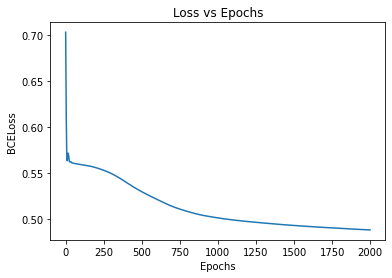

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_per_iteration)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')

In [ ]:
predictions = oneHot.inverse_transform(model(X_train).data.numpy())
print(f'Training Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_train), predictions)*100} %')

Training Acuuracy: 45.475850825351536 %


In [ ]:
outputs = model(X_test)
predictions = oneHot.inverse_transform(model(X_test).data.numpy())
print(f'Testing Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_test), predictions)*100} %')

Testing Acuuracy: 40.13314312886353 %


In [ ]:
import pandas as pd
df = pd.read_csv("prediction_results (18).csv")
df['Stage'] = df['Stage'].astype(float)

In [ ]:
df

,Stage
0,2.0
1,1.0
2,3.0
3,4.0
4,1.0
...,...
3195,3.0
3196,3.0
3197,1.0
3198,3.0


In [ ]:
from google.colab import files
df.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TESTING (43.79)
prediction_results (20)



In [ ]:
class Model4(nn.Module):
  def __init__(self):
    super(Model4 , self).__init__() 
    self.linear1 = nn.Linear(20 , 80) 
    self.linear1 = nn.Linear(80 , 80) 
    self.linear1 = nn.Linear(80 , 80) 
    self.linear1 = nn.Linear(80 , 80)
    self.linear1 = nn.Linear(80 , 80)
    self.linear1 = nn.Linear(80 , 80)
    self.linear1 = nn.Linear(80 , 20)
    self.linear1 = nn.Linear(20 , 20)
    self.linear2 = nn.Linear(20 , 4)

  def forward(self , data):
    out = self.linear1(data)  
    out = torch.sigmoid(out)
    out = self.linear2(out)
    out = torch.sigmoid(out)
    return out

In [ ]:
X = frame_data.loc[:, :].values
y = frame_new['Stage']
y2d = y.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
oneHot = OneHotEncoder()
y = oneHot.fit_transform(y2d).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from torch.autograd import Variable
X_train = Variable(torch.from_numpy(X_train).float())
Y_train = Variable(torch.from_numpy(Y_train).float())

X_test = Variable(torch.from_numpy(X_test).float())
Y_test = Variable(torch.from_numpy(Y_test).float())

In [ ]:
X_train.shape, Y_train.shape

(torch.Size([9814, 20]), torch.Size([9814, 4]))

In [ ]:
loss_per_iteration = []
def train_batch(epochs, model, criterion, optimizer):
  for i in range(1, epochs + 1):
    target = Y_train
    train_loss = 0.0
    outputs = model4(X_train)
    # target = target.unsqueeze(-1)
    loss = criterion(outputs, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss = loss.item()
    loss_per_iteration.append(train_loss)
    print(f"Epoch: {i}/{epochs} Loss: {train_loss}")

In [ ]:
model4 = Model4()

In [ ]:
model4 = Model4()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model4.parameters(), lr =0.001)

train_batch(epochs=10000,
            model=model4,
            criterion=criterion,
            optimizer=optimizer)

Streaming output truncated to the last 5000 lines.
Epoch: 5001/10000 Loss: 0.5126957297325134
Epoch: 5002/10000 Loss: 0.5126872658729553
Epoch: 5003/10000 Loss: 0.5126786828041077
Epoch: 5004/10000 Loss: 0.5126703381538391
Epoch: 5005/10000 Loss: 0.512661874294281
Epoch: 5006/10000 Loss: 0.5126534700393677
Epoch: 5007/10000 Loss: 0.5126450061798096
Epoch: 5008/10000 Loss: 0.5126366019248962
Epoch: 5009/10000 Loss: 0.5126281976699829
Epoch: 5010/10000 Loss: 0.5126197934150696
Epoch: 5011/10000 Loss: 0.5126113891601562
Epoch: 5012/10000 Loss: 0.5126029849052429
Epoch: 5013/10000 Loss: 0.5125946402549744
Epoch: 5014/10000 Loss: 0.5125863552093506
Epoch: 5015/10000 Loss: 0.512578010559082
Epoch: 5016/10000 Loss: 0.5125696063041687
Epoch: 5017/10000 Loss: 0.5125612020492554
Epoch: 5018/10000 Loss: 0.5125529170036316
Epoch: 5019/10000 Loss: 0.5125446319580078
Epoch: 5020/10000 Loss: 0.5125362873077393
Epoch: 5021/10000 Loss: 0.5125280618667603
Epoch: 5022/10000 Loss: 0.5125197172164917
Epoch

In [ ]:
saved_path = './SDS43.79'
torch.save(model4, saved_path)    

Text(0, 0.5, 'BCELoss')

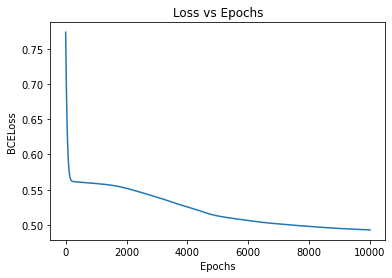

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_per_iteration)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')

In [ ]:
predictions = oneHot.inverse_transform(model4(X_train).data.numpy())
print(f'Training Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_train), predictions)*100} %')

Training Acuuracy: 45.20073364581211 %


In [ ]:
outputs = model4(X_test)
predictions = oneHot.inverse_transform(model4(X_test).data.numpy())
print(f'Testing Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_test), predictions)*100} %')

Testing Acuuracy: 41.70233000475511 %


In [ ]:
X = data_encoded1.loc[:, :].values
X = Variable(torch.from_numpy(X).float())

In [ ]:
predictions = oneHot.inverse_transform(model(X).data.numpy())
predictions

array([[3],
       [3],
       [3],
       ...,
       [4],
       [3],
       [3]])

In [ ]:
preds = pd.DataFrame(predictions, columns = ['Stage'])
preds 

,Stage
0,3
1,3
2,3
3,3
4,4
...,...
3193,3
3194,4
3195,4
3196,3


In [ ]:
preds.loc[-1] = ['2']  # adding a row
preds.index = preds.index + 1  # shifting index
preds.sort_index(inplace=True) 

In [ ]:
preds

,Stage
0,2
1,3
2,3
3,3
4,3
...,...
3194,3
3195,4
3196,4
3197,3


In [ ]:
preds.loc[len(preds.index)] = ['2'] 

In [ ]:
preds

,Stage
0,2
1,3
2,3
3,3
4,3
...,...
3195,4
3196,4
3197,3
3198,3


In [ ]:
target = preds

In [ ]:
res = pd.DataFrame(target)
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["Stage"]
res['Stage'] = res['Stage'].astype(float)

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>




---


---



# TESTING2

In [ ]:
class Model5(nn.Module):
  def __init__(self):
    super(Model5 , self).__init__() 
    self.linear1 = nn.Linear(20 , 80) 
    self.linear1 = nn.Linear(80 , 80) 
    self.linear1 = nn.Linear(80 , 80) 
    self.linear1 = nn.Linear(80 , 80)
    self.linear1 = nn.Linear(80 , 80)
    self.linear1 = nn.Linear(80 , 80)
    self.linear1 = nn.Linear(80 , 20)
    self.linear1 = nn.Linear(20 , 20)
    self.linear2 = nn.Linear(20 , 4)

  def forward(self , data):
    out = self.linear1(data)  
    out = torch.sigmoid(out)
    out = self.linear2(out)
    out = torch.sigmoid(out)
    return out

In [ ]:
X = frame_data.loc[:, :].values
y = frame_new['Stage']
y2d = y.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
oneHot = OneHotEncoder()
y = oneHot.fit_transform(y2d).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.0, random_state=0)

In [ ]:
from torch.autograd import Variable
X_train = Variable(torch.from_numpy(X_train).float())
Y_train = Variable(torch.from_numpy(Y_train).float())

X_test = Variable(torch.from_numpy(X_test).float())
Y_test = Variable(torch.from_numpy(Y_test).float())

In [ ]:
X_train.shape, Y_train.shape

In [ ]:
model4 = Model5()

In [ ]:
loss_per_iteration = []
def train_batch(epochs, model, criterion, optimizer):
  for i in range(1, epochs + 1):
    target = Y_train
    train_loss = 0.0
    outputs = model5(X_train)
    # target = target.unsqueeze(-1)
    loss = criterion(outputs, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss = loss.item()
    loss_per_iteration.append(train_loss)
    print(f"Epoch: {i}/{epochs} Loss: {train_loss}")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_per_iteration)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')

In [ ]:
predictions = oneHot.inverse_transform(model5(X_train).data.numpy())
print(f'Training Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_train), predictions)*100} %')

In [ ]:
outputs = model5(X_test)
predictions = oneHot.inverse_transform(model4(X_test).data.numpy())
print(f'Testing Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_test), predictions)*100} %')



---



---



---



---



---



# TRYING DIFFERENT IMPUTATION METHODS

In [ ]:
itr_imp = pd.read_csv('data_num_features_iterative_concat_oversample.csv')
itr_imp

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Drug_D-penicillamine,Drug_Missing,Drug_Placebo,Sex_F,Sex_M,Ascites_Missing,Ascites_N,Ascites_Y,Hepatomegaly_Missing,Hepatomegaly_N,Hepatomegaly_Y,Spiders_Missing,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage
0,0.3,84.000000,1500.800000,99.430000,109.000000,293.000000,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,4.0
1,0.3,68.546153,1835.400000,26.350000,131.000000,308.000000,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1.0
2,0.3,4.000000,1807.711103,77.359851,116.000000,194.000000,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,3.0
3,0.3,49.000000,1743.183132,26.350000,133.844802,284.127349,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,4.0
4,0.5,91.000000,1829.320773,104.560000,133.724322,306.000000,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,1.9,134.000000,330.100000,121.020000,138.751781,407.000000,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,3.0
14020,0.3,88.000000,289.000000,247.420000,130.000000,300.000000,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,3.0
14021,0.3,88.000000,1231.800000,33.450000,135.484420,250.000000,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,3.0
14022,0.3,82.000000,1122.400000,72.470000,135.645240,129.000000,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,3.0


In [ ]:
itr_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bilirubin             14024 non-null  float64
 1   Copper                14024 non-null  float64
 2   Alk_Phos              14024 non-null  float64
 3   SGOT                  14024 non-null  float64
 4   Tryglicerides         14024 non-null  float64
 5   Platelets             14024 non-null  float64
 6   Drug_D-penicillamine  14024 non-null  int64  
 7   Drug_Missing          14024 non-null  int64  
 8   Drug_Placebo          14024 non-null  int64  
 9   Sex_F                 14024 non-null  int64  
 10  Sex_M                 14024 non-null  int64  
 11  Ascites_Missing       14024 non-null  int64  
 12  Ascites_N             14024 non-null  int64  
 13  Ascites_Y             14024 non-null  int64  
 14  Hepatomegaly_Missing  14024 non-null  int64  
 15  Hepatomegaly_N     

In [ ]:
# Important Features: Ascites Edema Spiders Sex SGOT Alk_Phos Copper Status Bilirubin
# Least Important : N_Days Drug Age Prothrombin Albumin Cholesterol

In [ ]:
itr_imp1 = itr_imp.drop(['Stage', 'Drug_D-penicillamine','Drug_Missing','Drug_Placebo'],axis=1)
itr_imp1

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Sex_F,Sex_M,Ascites_Missing,Ascites_N,Ascites_Y,Hepatomegaly_Missing,Hepatomegaly_N,Hepatomegaly_Y,Spiders_Missing,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,0.3,84.000000,1500.800000,99.430000,109.000000,293.000000,1,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0.3,68.546153,1835.400000,26.350000,131.000000,308.000000,1,0,1,0,0,0,1,0,1,0,0,1,0,0
2,0.3,4.000000,1807.711103,77.359851,116.000000,194.000000,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3,0.3,49.000000,1743.183132,26.350000,133.844802,284.127349,1,0,1,0,0,0,0,1,0,0,1,1,0,0
4,0.5,91.000000,1829.320773,104.560000,133.724322,306.000000,1,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,1.9,134.000000,330.100000,121.020000,138.751781,407.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0
14020,0.3,88.000000,289.000000,247.420000,130.000000,300.000000,1,0,0,1,0,1,0,0,1,0,0,1,0,0
14021,0.3,88.000000,1231.800000,33.450000,135.484420,250.000000,1,0,0,0,1,0,1,0,0,1,0,1,0,0
14022,0.3,82.000000,1122.400000,72.470000,135.645240,129.000000,1,0,0,1,0,0,1,0,1,0,0,1,0,0


In [ ]:
X = itr_imp1.loc[:, :].values
y = itr_imp['Stage']
y2d = y.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
oneHot = OneHotEncoder()
y = oneHot.fit_transform(y2d).toarray()

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y, test_size = 0.3)

In [ ]:
class Model1(nn.Module):
  def __init__(self):
    super(Model1 , self).__init__() 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20)
    self.linear2 = nn.Linear(20 , 4)

  def forward(self , data):
    out = self.linear1(data)  
    out = torch.sigmoid(out)
    out = self.linear2(out)
    out = torch.sigmoid(out)
    return out

In [ ]:
from torch.autograd import Variable
X_train = Variable(torch.from_numpy(X_train).float())
Y_train = Variable(torch.from_numpy(Y_train).float())

X_test = Variable(torch.from_numpy(X_test).float())
Y_test = Variable(torch.from_numpy(Y_test).float())

In [ ]:
model1 = Model1()

In [ ]:
loss_per_iteration = []
def train_batch(epochs, model, criterion, optimizer):
  for i in range(1, epochs + 1):
    train_loss = 0.0
    target = Y_train
    outputs = model1(X_train)
    # target = target.unsqueeze(-1)
    loss = criterion(outputs, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss = loss.item()
    loss_per_iteration.append(train_loss)
    print(f"Epoch: {i}/{epochs} Loss: {train_loss}")

In [ ]:
model = Model1()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr =0.01)

train_batch(epochs=2000,
            model=model,
            criterion=criterion,
            optimizer=optimizer)

Epoch: 1/2000 Loss: 0.7440001964569092
Epoch: 2/2000 Loss: 0.7182446122169495
Epoch: 3/2000 Loss: 0.694940447807312
Epoch: 4/2000 Loss: 0.6748378872871399
Epoch: 5/2000 Loss: 0.6579315066337585
Epoch: 6/2000 Loss: 0.6421274542808533
Epoch: 7/2000 Loss: 0.627085268497467
Epoch: 8/2000 Loss: 0.6117985844612122
Epoch: 9/2000 Loss: 0.5994248986244202
Epoch: 10/2000 Loss: 0.5893962979316711
Epoch: 11/2000 Loss: 0.5820943713188171
Epoch: 12/2000 Loss: 0.577269434928894
Epoch: 13/2000 Loss: 0.5733367204666138
Epoch: 14/2000 Loss: 0.5703887343406677
Epoch: 15/2000 Loss: 0.568080723285675
Epoch: 16/2000 Loss: 0.5663447380065918
Epoch: 17/2000 Loss: 0.5651342272758484
Epoch: 18/2000 Loss: 0.564304530620575
Epoch: 19/2000 Loss: 0.5636833310127258
Epoch: 20/2000 Loss: 0.5633817911148071
Epoch: 21/2000 Loss: 0.5632802248001099
Epoch: 22/2000 Loss: 0.5633209943771362
Epoch: 23/2000 Loss: 0.5634545683860779
Epoch: 24/2000 Loss: 0.5636271834373474
Epoch: 25/2000 Loss: 0.5638265609741211
Epoch: 26/2000

In [ ]:
predictions = oneHot.inverse_transform(model1(X_train).data.numpy())
print(f'Training Accuracy: {accuracy_score(oneHot.inverse_transform(Y_train), predictions)*100} %')

Training Accuracy: 28.50448247758761 %


In [ ]:
outputs = model1(X_test)
predictions = oneHot.inverse_transform(model1(X_test).data.numpy())
print(f'Testing Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_test), predictions)*100} %')

Testing Acuuracy: 26.687262357414447 %


In [ ]:
from sklearn.metrics import f1_score

f1_score(oneHot.inverse_transform(Y_test), predictions, average='weighted')

0.19628472838071917

Text(0, 0.5, 'BCELoss')

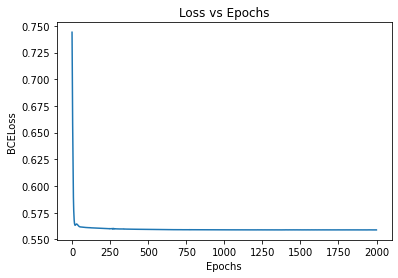

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_per_iteration)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')



---



---



---

# KNN CONCAT

In [ ]:
knn_cat = pd.read_csv('data_num_features_knn_concat_oversample.csv')
knn_cat

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Drug_D-penicillamine,Drug_Missing,Drug_Placebo,Sex_F,Sex_M,Ascites_Missing,Ascites_N,Ascites_Y,Hepatomegaly_Missing,Hepatomegaly_N,Hepatomegaly_Y,Spiders_Missing,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage
0,0.3,84.0,1500.80,99.430,109.0,293.0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,4.0
1,0.3,27.4,1835.40,26.350,131.0,308.0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1.0
2,0.3,4.0,2002.34,64.442,116.0,194.0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,3.0
3,0.3,49.0,1436.66,26.350,120.8,236.8,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,4.0
4,0.5,91.0,1597.58,104.560,118.2,306.0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,1.9,134.0,330.10,121.020,151.6,407.0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,3.0
14020,0.3,88.0,289.00,247.420,130.0,300.0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,3.0
14021,0.3,88.0,1231.80,33.450,182.4,250.0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,3.0
14022,0.3,82.0,1122.40,72.470,136.2,129.0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,3.0


In [ ]:
knn_cat1 = knn_cat.drop(['Stage', 'Drug_D-penicillamine','Drug_Missing','Drug_Placebo'],axis=1)
knn_cat1

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Sex_F,Sex_M,Ascites_Missing,Ascites_N,Ascites_Y,Hepatomegaly_Missing,Hepatomegaly_N,Hepatomegaly_Y,Spiders_Missing,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,0.3,84.0,1500.80,99.430,109.0,293.0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0.3,27.4,1835.40,26.350,131.0,308.0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
2,0.3,4.0,2002.34,64.442,116.0,194.0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3,0.3,49.0,1436.66,26.350,120.8,236.8,1,0,1,0,0,0,0,1,0,0,1,1,0,0
4,0.5,91.0,1597.58,104.560,118.2,306.0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,1.9,134.0,330.10,121.020,151.6,407.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
14020,0.3,88.0,289.00,247.420,130.0,300.0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
14021,0.3,88.0,1231.80,33.450,182.4,250.0,1,0,0,0,1,0,1,0,0,1,0,1,0,0
14022,0.3,82.0,1122.40,72.470,136.2,129.0,1,0,0,1,0,0,1,0,1,0,0,1,0,0


In [ ]:
knn_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bilirubin             14024 non-null  float64
 1   Copper                14024 non-null  float64
 2   Alk_Phos              14024 non-null  float64
 3   SGOT                  14024 non-null  float64
 4   Tryglicerides         14024 non-null  float64
 5   Platelets             14024 non-null  float64
 6   Drug_D-penicillamine  14024 non-null  int64  
 7   Drug_Missing          14024 non-null  int64  
 8   Drug_Placebo          14024 non-null  int64  
 9   Sex_F                 14024 non-null  int64  
 10  Sex_M                 14024 non-null  int64  
 11  Ascites_Missing       14024 non-null  int64  
 12  Ascites_N             14024 non-null  int64  
 13  Ascites_Y             14024 non-null  int64  
 14  Hepatomegaly_Missing  14024 non-null  int64  
 15  Hepatomegaly_N     

In [ ]:
X = knn_cat1.loc[:, :].values
y = knn_cat['Stage']
y2d = y.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
oneHot = OneHotEncoder()
y = oneHot.fit_transform(y2d).toarray()

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y, test_size = 0.3)

In [ ]:
class Model2(nn.Module):
  def __init__(self):
    super(Model2 , self).__init__() 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20)
    self.linear2 = nn.Linear(20 , 4)

  def forward(self , data):
    out = self.linear1(data)  
    out = torch.sigmoid(out)
    out = self.linear2(out)
    out = torch.sigmoid(out)
    return out

In [ ]:
from torch.autograd import Variable
X_train = Variable(torch.from_numpy(X_train).float())
Y_train = Variable(torch.from_numpy(Y_train).float())

X_test = Variable(torch.from_numpy(X_test).float())
Y_test = Variable(torch.from_numpy(Y_test).float())

In [ ]:
model2 = Model2()

In [ ]:
loss_per_iteration = []
def train_batch(epochs, model, criterion, optimizer):
  for i in range(1, epochs + 1):
    train_loss = 0.0
    target = Y_train
    outputs = model2(X_train)
    # target = target.unsqueeze(-1)
    loss = criterion(outputs, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss = loss.item()
    loss_per_iteration.append(train_loss)
    print(f"Epoch: {i}/{epochs} Loss: {train_loss}")

In [ ]:
model2 = Model2()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr =0.01)

train_batch(epochs=2000,
            model=model,
            criterion=criterion,
            optimizer=optimizer)

Epoch: 1/2000 Loss: 0.7440041303634644
Epoch: 2/2000 Loss: 0.7040073275566101
Epoch: 3/2000 Loss: 0.6714798212051392
Epoch: 4/2000 Loss: 0.6465857028961182
Epoch: 5/2000 Loss: 0.6272268891334534
Epoch: 6/2000 Loss: 0.6118735671043396
Epoch: 7/2000 Loss: 0.59947669506073
Epoch: 8/2000 Loss: 0.5896764397621155
Epoch: 9/2000 Loss: 0.5815518498420715
Epoch: 10/2000 Loss: 0.5756164193153381
Epoch: 11/2000 Loss: 0.5710498690605164
Epoch: 12/2000 Loss: 0.5677076578140259
Epoch: 13/2000 Loss: 0.5654067397117615
Epoch: 14/2000 Loss: 0.5635342001914978
Epoch: 15/2000 Loss: 0.5629586577415466
Epoch: 16/2000 Loss: 0.5631277561187744
Epoch: 17/2000 Loss: 0.563605785369873
Epoch: 18/2000 Loss: 0.5643501281738281
Epoch: 19/2000 Loss: 0.5652074217796326
Epoch: 20/2000 Loss: 0.5660392045974731
Epoch: 21/2000 Loss: 0.5667269825935364
Epoch: 22/2000 Loss: 0.5672581791877747
Epoch: 23/2000 Loss: 0.5676378011703491
Epoch: 24/2000 Loss: 0.5678408145904541
Epoch: 25/2000 Loss: 0.5678542852401733
Epoch: 26/20

In [ ]:
predictions = oneHot.inverse_transform(model2(X_train).data.numpy())
print(f'Training Accuracy: {accuracy_score(oneHot.inverse_transform(Y_train), predictions)*100} %')

Training Accuracy: 25.091687041564793 %


In [ ]:
outputs = model1(X_test)
predictions = oneHot.inverse_transform(model1(X_test).data.numpy())
print(f'Testing Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_test), predictions)*100} %')

Testing Acuuracy: 24.714828897338403 %


Text(0, 0.5, 'BCELoss')

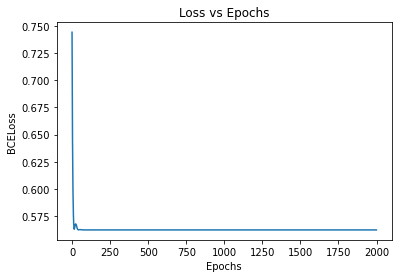

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_per_iteration)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')



---



---
# MULTIPLE IMPUTE


In [ ]:
mul_imp = pd.read_csv('data_num_features_multipleimpute_concat_oversample.csv')
mul_imp

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Drug_D-penicillamine,Drug_Missing,Drug_Placebo,Sex_F,Sex_M,Ascites_Missing,Ascites_N,Ascites_Y,Hepatomegaly_Missing,Hepatomegaly_N,Hepatomegaly_Y,Spiders_Missing,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage
0,0.3,84.000000,1500.800000,99.430000,109.000000,293.000000,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,4.0
1,0.3,66.804317,1835.400000,26.350000,131.000000,308.000000,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1.0
2,0.3,4.000000,1756.688188,75.266889,116.000000,194.000000,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,3.0
3,0.3,49.000000,1710.667465,26.350000,131.068119,284.475346,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,4.0
4,0.5,91.000000,1810.586625,104.560000,136.079956,306.000000,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,1.9,134.000000,330.100000,121.020000,145.993863,407.000000,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,3.0
14020,0.3,88.000000,289.000000,247.420000,130.000000,300.000000,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,3.0
14021,0.3,88.000000,1231.800000,33.450000,135.369832,250.000000,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,3.0
14022,0.3,82.000000,1122.400000,72.470000,135.762193,129.000000,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,3.0


In [ ]:
mul_imp1 = mul_imp.drop(['Stage', 'Drug_D-penicillamine','Drug_Missing','Drug_Placebo'],axis=1)
mul_imp1

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Sex_F,Sex_M,Ascites_Missing,Ascites_N,Ascites_Y,Hepatomegaly_Missing,Hepatomegaly_N,Hepatomegaly_Y,Spiders_Missing,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,0.3,84.000000,1500.800000,99.430000,109.000000,293.000000,1,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0.3,66.804317,1835.400000,26.350000,131.000000,308.000000,1,0,1,0,0,0,1,0,1,0,0,1,0,0
2,0.3,4.000000,1756.688188,75.266889,116.000000,194.000000,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3,0.3,49.000000,1710.667465,26.350000,131.068119,284.475346,1,0,1,0,0,0,0,1,0,0,1,1,0,0
4,0.5,91.000000,1810.586625,104.560000,136.079956,306.000000,1,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,1.9,134.000000,330.100000,121.020000,145.993863,407.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0
14020,0.3,88.000000,289.000000,247.420000,130.000000,300.000000,1,0,0,1,0,1,0,0,1,0,0,1,0,0
14021,0.3,88.000000,1231.800000,33.450000,135.369832,250.000000,1,0,0,0,1,0,1,0,0,1,0,1,0,0
14022,0.3,82.000000,1122.400000,72.470000,135.762193,129.000000,1,0,0,1,0,0,1,0,1,0,0,1,0,0


In [ ]:
X = mul_imp1.loc[:, :].values
y = mul_imp['Stage']
y2d = y.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
oneHot = OneHotEncoder()
y = oneHot.fit_transform(y2d).toarray()

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y, test_size = 0.3)

In [ ]:
class Model3(nn.Module):
  def __init__(self):
    super(Model3 , self).__init__() 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20) 
    self.linear1 = nn.Linear(20 , 20)
    self.linear2 = nn.Linear(20 , 4)

  def forward(self , data):
    out = self.linear1(data)  
    out = torch.sigmoid(out)
    out = self.linear2(out)
    out = torch.sigmoid(out)
    return out

In [ ]:
from torch.autograd import Variable
X_train = Variable(torch.from_numpy(X_train).float())
Y_train = Variable(torch.from_numpy(Y_train).float())

X_test = Variable(torch.from_numpy(X_test).float())
Y_test = Variable(torch.from_numpy(Y_test).float())

In [ ]:
model3 = Model3()

In [ ]:
loss_per_iteration = []
def train_batch(epochs, model, criterion, optimizer):
  for i in range(1, epochs + 1):
    train_loss = 0.0
    target = Y_train
    outputs = model3(X_train)
    # target = target.unsqueeze(-1)
    loss = criterion(outputs, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss = loss.item()
    loss_per_iteration.append(train_loss)
    print(f"Epoch: {i}/{epochs} Loss: {train_loss}")

In [ ]:
model3 = Model3()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr =0.01)

train_batch(epochs=2000,
            model=model3,
            criterion=criterion,
            optimizer=optimizer)

Epoch: 1/2000 Loss: 0.7048074007034302
Epoch: 2/2000 Loss: 0.6768033504486084
Epoch: 3/2000 Loss: 0.6522333025932312
Epoch: 4/2000 Loss: 0.6310797333717346
Epoch: 5/2000 Loss: 0.61246657371521
Epoch: 6/2000 Loss: 0.5974743962287903
Epoch: 7/2000 Loss: 0.5851720571517944
Epoch: 8/2000 Loss: 0.5764517784118652
Epoch: 9/2000 Loss: 0.5710216760635376
Epoch: 10/2000 Loss: 0.567539393901825
Epoch: 11/2000 Loss: 0.5654379725456238
Epoch: 12/2000 Loss: 0.5641565322875977
Epoch: 13/2000 Loss: 0.5636475086212158
Epoch: 14/2000 Loss: 0.5636261105537415
Epoch: 15/2000 Loss: 0.5639070868492126
Epoch: 16/2000 Loss: 0.5644305348396301
Epoch: 17/2000 Loss: 0.565011739730835
Epoch: 18/2000 Loss: 0.5655885934829712
Epoch: 19/2000 Loss: 0.5661120414733887
Epoch: 20/2000 Loss: 0.5665505528450012
Epoch: 21/2000 Loss: 0.5668243169784546
Epoch: 22/2000 Loss: 0.5669267177581787
Epoch: 23/2000 Loss: 0.5669153332710266
Epoch: 24/2000 Loss: 0.5667749047279358
Epoch: 25/2000 Loss: 0.5665132403373718
Epoch: 26/200

In [ ]:
predictions = oneHot.inverse_transform(model3(X_train).data.numpy())
print(f'Training Accuracy: {accuracy_score(oneHot.inverse_transform(Y_train), predictions)*100} %')

Training Accuracy: 26.181744091279548 %


In [ ]:
outputs = model1(X_test)
predictions = oneHot.inverse_transform(model3(X_test).data.numpy())
print(f'Testing Acuuracy: {accuracy_score(oneHot.inverse_transform(Y_test), predictions)*100} %')

Testing Acuuracy: 26.61596958174905 %


Text(0, 0.5, 'BCELoss')

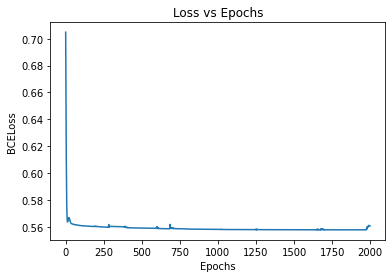

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_per_iteration)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')